In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using StatsBase, Distributions, Plots, LinearAlgebra, Plots

In [3]:
using Revise

includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_simulate.jl") 

In [4]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]
X = [.12, .06]


n_samples = 1000
test_regimes = simulate_regimes(states_zero, transition_matrix, n_samples, 1)
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, n_samples, 1)[:,:,1]'

1000×2 adjoint(::Matrix{Float64}) with eltype Float64:
  0.239691   0.1018
  0.126967   0.0897552
  0.192515   0.117318
  0.0710007  0.13746
  0.106266   0.0927589
  0.100531   0.0952593
  0.118033   0.120384
  0.163366   0.0906564
  0.130836   0.0916109
  0.107388   0.13755
  ⋮          
  0.230475   0.0972356
  0.292737   0.111697
  0.252299   0.132715
  0.295481   0.198174
  0.261205   0.249673
  0.118501   0.276896
 -0.152711   0.263825
  0.0250469  0.15187
 -0.0164372  0.16522

In [5]:
Y = collect(test_returns[2:end,:])
T = n_samples
p = 1
X = hcat(ones(T-1), test_returns[p:end-1,:])
k= 2 #n_regimes
n_variables = 2

#Β = [randn(n_variables, n_variables+1) for _ in 1:k]

Β1 = [.06 .35 .25; .035 .2 .65]

Β2 = [-.05 .45 .15; .035 .15 .63]

Β = [Β1, Β2]

Σ1 = cor2cov([1 .1; .1 1], [.05, .02])
Σ2 = cor2cov([1 .5; .5 1], [.10, .05]) 
Σ = [Σ1, Σ2]

#Σ = rand(InverseWishart(4, [.001 0; 0 .015]),k)

#init_regimes = rand(k) 
#init_regimes = init_regimes ./ sum(init_regimes)

t_m = [.55 .45;.45 .55]

result = expectation_maximisation(Y, X, k, Β, Σ, t_m, 50)



MSVARResult([4.847747673857991e-14 0.9999999999999516; 3.591431742395492e-14 0.9999999999999641; … ; 3.770892829530255e-14 0.9999999999999624; 8.412182350098065e-14 0.9999999999999158], [4.847747673866686e-14 0.9999999999999967; 3.591431742401936e-14 1.000000000000009; … ; 3.770892829536667e-14 0.9999999999999624; 8.412182350098065e-14 0.9999999999999158], [3.5990050299369146e-26 1.0; 1.784569555725979e-12 0.9999999999982154], Any[[-19003.537034224843 41926.87082251865 -115710.48075636769; -2794.756855261595 6012.117497539262 59123.19224954488], [0.03367607924621797 0.48117204509191713 0.1329809252793662; 0.029409816327601528 0.1289300722786334 0.6204784882284322]], Any[[0.0091069632122136 -0.00024619231516007496; -0.000246192315160075 0.002102474493101147], [0.02032625007020623 0.001092288824640171; 0.001092288824640171 0.0010428984980401942]], [2442.002948872651, 2313.086586559355, 2316.6628178224987, 2394.887536417416, 2488.813136390638, 2541.3211256411983, 2562.4890008149514, 2566.

In [6]:
round.(result.regimes, digits=4)

999×2 Matrix{Float64}:
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 ⋮    
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0

In [7]:
round.(result.smoothed_regimes, digits=4)

999×2 Matrix{Float64}:
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 ⋮    
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0

In [8]:
all(result.smoothed_regimes .> 0)

true

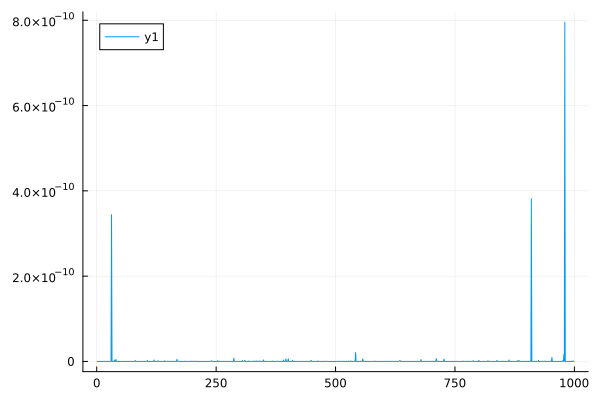

In [9]:
plot(result.smoothed_regimes[:,1])


In [10]:
result.Β


2-element Vector{Any}:
 [-19003.537034224843 41926.87082251865 -115710.48075636769; -2794.756855261595 6012.117497539262 59123.19224954488]
 [0.03367607924621797 0.48117204509191713 0.1329809252793662; 0.029409816327601528 0.1289300722786334 0.6204784882284322]

In [11]:
result.Σ

2-element Vector{Any}:
 [0.0091069632122136 -0.00024619231516007496; -0.000246192315160075 0.002102474493101147]
 [0.02032625007020623 0.001092288824640171; 0.001092288824640171 0.0010428984980401942]

In [12]:
result.transition_matrix

2×2 Matrix{Float64}:
 3.59901e-26  1.0
 1.78457e-12  1.0

In [13]:
sum(result.transition_matrix, dims=2)

2×1 Matrix{Float64}:
 1.0
 1.0

In [14]:
l = result.likehoods

50-element Vector{Float64}:
 2442.002948872651
 2313.086586559355
 2316.6628178224987
 2394.887536417416
 2488.813136390638
 2541.3211256411983
 2562.4890008149514
 2566.7872088895347
 2569.235856288825
 2569.3121120898263
    ⋮
 2569.312188277597
 2569.312188277597
 2569.312188277597
 2569.312188277597
 2569.312188277597
 2569.312188277597
 2569.312188277597
 2569.312188277597
 2569.312188277597

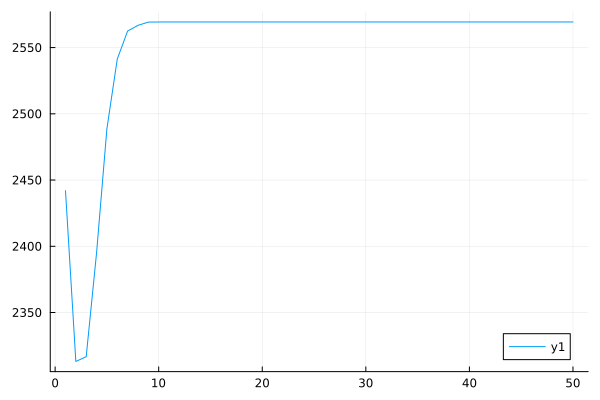

In [15]:
plot(l)

In [16]:
init_regimes =  initial_regimes_probs(result.transition_matrix)

UndefVarError: UndefVarError: `initial_regimes_probs` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [17]:
log_likehood(Y,X,result.Β, result.Σ, result.transition_matrix, init_regimes)

UndefVarError: UndefVarError: `init_regimes` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

- zwraca transition matrix ktorej warotsci nie sumuja si edo jedngo
- dziwne wartosci coefficients
- zwraca regime probs, gdzie regime 1 jest cały czas jeden
- przetestowac transition matrix, gdy regime probs sa 1 0, rozne kombinacje

In [18]:
init_regimes = initial_regimes_probs(result.transition_matrix)
jr = joined_regimes_probs(result.regimes, result.smoothed_regimes, init_regimes, result.transition_matrix)
#sum(jr, dims=2)

UndefVarError: UndefVarError: `initial_regimes_probs` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [19]:
est_r = est_transition_matrix(jr[1:end,:], result.regimes[2:end,:], init_regimes)


UndefVarError: UndefVarError: `jr` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [20]:
sum(est_r, dims=2)

UndefVarError: UndefVarError: `est_r` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [21]:
r = [.9 .1; .8 .2; .85 .15]


3×2 Matrix{Float64}:
 0.9   0.1
 0.8   0.2
 0.85  0.15